# Assignment

Link for Datasets
(https://drive.google.com/drive/folders/105ftuIwN9kqyPNEEm3E6IM7LqywjyvJa?usp=sharing)

Q21. Write a pandas program to import three datasheets from a given
excel data (coalpublic2013.xlsx ) in to a single dataframe.
 
Note: Structure of three datasheets are same.

In [2]:
import pandas as pd
df = pd.read_excel('/home/shreya/Downloads/coalpublic2013.xlsx')
print(df.head())

   Year  MSHA ID                       Mine_Name  Production  Labor_Hours
0  2013   103381            Tacoa Highwall Miner       56004        22392
1  2013   103404                Reid School Mine       28807        28447
2  2013   100759  North River #1 Underground Min     1440115       474784
3  2013   103246                      Bear Creek       87587        29193
4  2013   103451                     Knight Mine      147499        46393


Q 22. Write a pandas program to import three datasheets from a given
excel data (employee.xlsx ) into a single data frame and export the
result into new Excel file.
 
Note: Structure of three datasheets are same.

In [3]:
df1 = pd.read_excel('/home/shreya/Downloads/employee.xlsx', sheet_name=0)
df2 = pd.read_excel('/home/shreya/Downloads/employee.xlsx', sheet_name=1)
df3 = pd.read_excel('/home/shreya/Downloads/employee.xlsx', sheet_name=2)
df4 = pd.concat([df1, df2, df3])
print(df4.head())
df4.to_excel('employees.xlsx')

   emp_id first_name last_name  hire_date
0     100     Steven      King 2003-06-17
1     101      Neena   Kochhar 2005-09-21
2     102        Lex   De Haan 2001-01-13
3     103  Alexander    Hunold 2006-01-03
4     104      Bruce     Ernst 2007-05-21


Q23. Write a pandas program to create the Pivot table with multiple
indexes from the data set of the titanic.csv.

In [5]:
import numpy as np
data = pd.read_csv('/home/shreya/Downloads/titanic.csv')
print(data.head())
pivot = pd.pivot_table(data, index=['survived', 'sex'], values='age', columns='class', aggfunc=np.median)
print(pivot)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Unnamed: 15  
0    man        True  NaN  Southampton    no  False          NaN  
1  woman       False    C    Cherbourg   yes  False          NaN  
2  woman       False  NaN  Southampton   yes   True          NaN  
3  woman       False    C  Southampton   yes  False          NaN  
4    man        True  NaN  Southampton    no   True          NaN  
class            First  Second  Third
survived sex                         
0        female   25.0    32.5   22.0
         male     45.5    3

Q24. Write a Pandas program to create the Pivot table and find survival
rate by gender?

In [6]:
d = data['sex'].value_counts()
group = data[data['survived']==1]['sex'].value_counts()/d
print(group.head())

female    0.742038
male      0.188908
Name: sex, dtype: float64


Q25. Write a pandas program to make partition each of the passengers
into 4 categories based on their age.
 
Note: Age categories- (0, 10), (10, 30), (30, 60), (60, 80)

In [7]:
data.dropna()
def age_group(x):
    x= float(x)
    if x<10:
        return '(0, 10)'
    if x>=10 and x<30:
        return '(10, 30)'
    if x>=30 and x<60:
        return '(30, 60)'
    else:
        return '(60, 80)'
data['group'] = data['age'].apply(age_group)
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  Unnamed: 15     group  
0    man        True  NaN  Southampton    no  False          NaN  (10, 30)  
1  woman       False    C    Cherbourg   yes  False          NaN  (30, 60)  
2  woman       False  NaN  Southampton   yes   True          NaN  (10, 30)  
3  woman       False    C  Southampton   yes  False          NaN  (30, 60)  
4    man        True  NaN  Southampton    no   True          NaN  (30, 60)  


Q26. Write a pandas program to create the Pivot table and find survival
rate by the gender, age of the different categories of various
classes.

In [10]:
age = pd.cut(data['age'], [0, 10, 30, 60, 80])
result = data.pivot_table('survived', index=['sex', age], columns='class')
print(result)

class               First    Second     Third
sex    age                                   
female (0, 10]   0.000000  1.000000  0.500000
       (10, 30]  0.970588  0.916667  0.508772
       (30, 60]  0.979167  0.900000  0.272727
       (60, 80]  1.000000       NaN  1.000000
male   (0, 10]   1.000000  1.000000  0.363636
       (10, 30]  0.458333  0.023256  0.139073
       (30, 60]  0.412698  0.090909  0.118421
       (60, 80]  0.083333  0.333333  0.000000


Q27. Write a pandas program to create the Pivot table and calculate
number of women and men were in a particular cabin class.


In [11]:
result1 = data.pivot_table( index='sex', columns='pclass', aggfunc='count')
print(result1)

       Unnamed: 15       adult_male            age          alive  ... parch  \
pclass           1  2  3          1    2    3    1   2    3     1  ...     3   
sex                                                                ...         
female           0  0  0         94   76  144   85  74  102    94  ...   144   
male             0  0  0        122  108  347  101  99  253   122  ...   347   

       sibsp           survived            who            
pclass     1    2    3        1    2    3    1    2    3  
sex                                                       
female    94   76  144       94   76  144   94   76  144  
male     122  108  347      122  108  347  122  108  347  

[2 rows x 45 columns]


Q28. Write a pandas program to create the Pivot table and separate
the gender according to whether they travelled alone or not to get
the probability of survival


In [12]:
result1 = data.pivot_table('survived', index=['sex','alone'])
print(result1)

              survived
sex    alone          
female False  0.712766
       True   0.785714
male   False  0.271084
       True   0.155718


Q29. Write a pandas program to create the Pivot table and find the
probability of survival by class, gender, solo boarding, and the port
of embarkation.

In [13]:
result = data.pivot_table('survived', ['sex' , 'alone' ], [ 'embark_town', 'class' ])
print(result)

embark_town  Cherbourg                     Queenstown                   \
class            First    Second     Third      First Second     Third   
sex    alone                                                             
female False  1.000000  1.000000  0.611111        1.0    NaN  0.625000   
       True   0.944444  1.000000  0.800000        NaN    1.0  0.760000   
male   False  0.473684  0.166667  0.500000        0.0    NaN  0.100000   
       True   0.347826  0.250000  0.151515        NaN    0.0  0.068966   

embark_town  Southampton                      
class              First    Second     Third  
sex    alone                                  
female False    0.941176  0.923077  0.327586  
       True     1.000000  0.892857  0.466667  
male   False    0.407407  0.300000  0.142857  
       True     0.326923  0.089552  0.123762  


Q30. Write a pandas program to get current date, oldest date and
number of days between Current date and the oldest date of Ufo
dataset.

In [32]:
df = pd.read_csv('/home/shreya/Downloads/ufo_sighting_data.csv')
df[['date','time']] = df['Date_time'].str.split(expand=True)
df['Date_time'] = (pd.to_datetime(df['date']) + pd.to_timedelta(df.pop('time') + ':00'))
df['Date_time'] = df['Date_time'].astype('datetime64[ns]')
print("\nCurrent date of Ufo dataset:")
print(df['Date_time'].max())
print("\nOldest date of Ufo dataset:")
print(df['Date_time'].min())
print("\nNumber of days between Current date and oldest date of Ufo dataset:")
print((df['Date_time'].max() - df['Date_time'].min()).days)

/home/shreya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Current date of Ufo dataset:
2014-05-08 18:45:00

Oldest date of Ufo dataset:
1906-11-11 00:00:00

Number of days between Current date and oldest date of Ufo dataset:
39260


Q31. Write a pandas program to get all sighting days of the
unidentified flying object (ufo) between 1950-10-10 and 1960-10-
10.

In [33]:
selected_period = df[(df['Date_time'] >= '1950-10-10 00:00:00') & (df['Date_time'] <= '1960-10-10 23:59:59')]
print(selected_period.head())

              Date_time                  city state/province country  \
2   1955-10-10 17:00:00  chester (uk/england)            NaN      gb   
3   1956-10-10 21:00:00                  edna             tx      us   
4   1960-10-10 20:00:00               kaneohe             hi      us   
480 1952-10-01 03:30:00       fukuoka (japan)            NaN     NaN   
481 1952-10-01 12:00:00           kansas city             mo      us   

    UFO_shape length_of_encounter_seconds described_duration_of_encounter  \
2      circle                          20                      20 seconds   
3      circle                          20                        1/2 hour   
4       light                         900                      15 minutes   
480      disk                        1200                   about 20 mins   
481      disk                          90                         90 sec.   

                                           description date_documented  \
2    Green/Orange circular dis

Q32. Write a Pandas program to extract the year, month, day, hour,
minute, second, and weekday from unidentified flying object (UFO)
reporting date.

In [34]:
df['year'] = df['Date_time'].dt.year
df['month'] = df['Date_time'].dt.month
df['day'] = df['Date_time'].dt.day
df['hour'] = df['Date_time'].dt.hour
df['minute'] = df['Date_time'].dt.minute
df['second'] = df['Date_time'].dt.second
df['day'] = df['Date_time'].dt.day_name
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude,date,year,month,day,hour,minute,second
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10/10/1949,1949,10,<bound method PandasDelegate._add_delegate_acc...,20,30,0
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10/10/1949,1949,10,<bound method PandasDelegate._add_delegate_acc...,21,0,0
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10/10/1955,1955,10,<bound method PandasDelegate._add_delegate_acc...,17,0,0
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10/10/1956,1956,10,<bound method PandasDelegate._add_delegate_acc...,21,0,0
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10/10/1960,1960,10,<bound method PandasDelegate._add_delegate_acc...,20,0,0


Q33. Write a pandas program to count year-country wise frequency of
reporting dates of the unidentified flying object(UFO).


In [35]:
result = df.groupby(['year', 'country']).size()
print(result)

year  country
1910  us            2
1920  us            1
1925  us            1
1929  us            1
1931  us            2
1934  us            1
1936  ca            1
      us            1
1937  us            2
1939  us            3
1941  us            1
1942  us            2
1943  gb            1
      us            1
1944  us            3
1945  us            7
1946  ca            1
      us            8
1947  us           33
1948  us            7
1949  us           15
1950  us           21
1951  ca            2
      gb            1
      us           13
1952  ca            2
      gb            1
      us           37
1953  ca            2
      us           26
                 ... 
2009  au           14
      ca          134
      de            6
      gb          202
      us         3678
2010  au           16
      ca          137
      de            4
      gb          115
      us         3548
2011  au           13
      ca          127
      de            3
      gb          

Q34. Write a pandas program to get the difference (in days) between
documented date and reporting date of unidentified flying object
(UFO).

In [36]:
df['date_documented'] = df['date_documented'].astype('datetime64[ns]')
df['Difference'] = (df['date_documented'] - df['Date_time']).dt.days
print(df.head())

            Date_time                  city state/province country UFO_shape  \
0 1949-10-10 20:30:00            san marcos             tx      us  cylinder   
1 1949-10-10 21:00:00          lackland afb             tx     NaN     light   
2 1955-10-10 17:00:00  chester (uk/england)            NaN      gb    circle   
3 1956-10-10 21:00:00                  edna             tx      us    circle   
4 1960-10-10 20:00:00               kaneohe             hi      us     light   

  length_of_encounter_seconds described_duration_of_encounter  \
0                        2700                      45 minutes   
1                        7200                         1-2 hrs   
2                          20                      20 seconds   
3                          20                        1/2 hour   
4                         900                      15 minutes   

                                         description date_documented  \
0  This event took place in early fall around 194...    

Q35. Write a pandas program to generate sequences of fixedfrequency dates and time spans.

In [37]:
dtr = pd.date_range('2018-01-01', periods=5, freq='H')
print("Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='min')
print("\nMinutely frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='S')
print("\nSecondly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='2H')
print("\nMultiple Hourly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='5min')
print("\nMultiple Minutely frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='BQ')
print("\nMultiple Secondly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='w')
print("\nWeekly frequency:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='2h20min')
print("\nCombine together day and intraday offsets-1:")
print(dtr)
dtr = pd.date_range('2018-01-01', periods=5, freq='1D10U')
print("\nCombine together day and intraday offsets-2:")
print(dtr)

Hourly frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

Minutely frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:01:00',
               '2018-01-01 00:02:00', '2018-01-01 00:03:00',
               '2018-01-01 00:04:00'],
              dtype='datetime64[ns]', freq='T')

Secondly frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

Multiple Hourly frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 02:00:00',
               '2018-01-01 04:00:00', '2018-01-01 06:00:00',
               '2018-01-01 08:00:00'],
              dtype='datetime64[ns]', freq='2H')

Multiple Minutely frequency:
DatetimeIndex(['2018-01-01 00:00:00', '2018-0

Q36. Write a pandas program to manipulate and convert date times
with timezone information.

In [38]:
dtt = pd.date_range('2018-01-01', periods=3, freq='H')
dtt = dtt.tz_localize('UTC')
print(dtt)
print("\nFrom UTC to Europe/Berlin:")
dtt = dtt.tz_convert('Europe/Berlin')
print(dtt)

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 01:00:00+00:00',
               '2018-01-01 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='H')

From UTC to Europe/Berlin:
DatetimeIndex(['2018-01-01 01:00:00+01:00', '2018-01-01 02:00:00+01:00',
               '2018-01-01 03:00:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='H')


Q37. Write a pandas program to create the graphical analysis of UFO
(unidentified flying object) Sightings year.

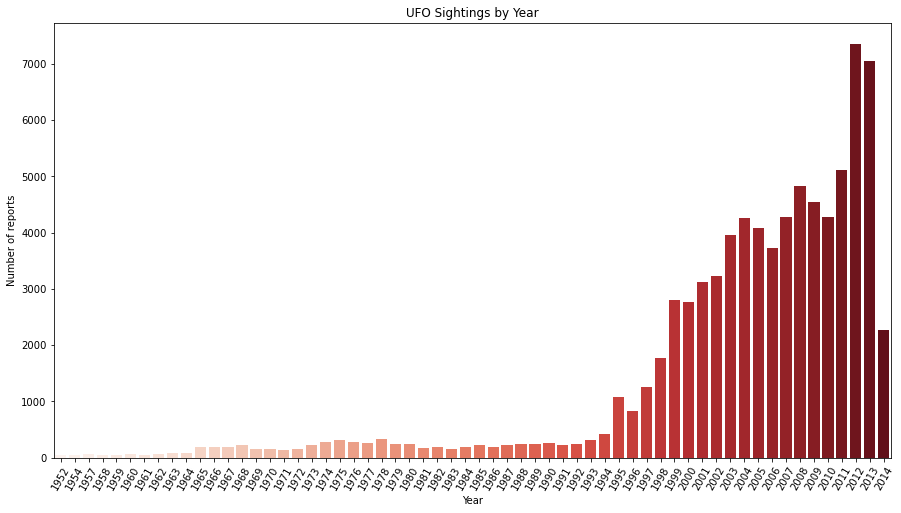

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt
df["ufo_yr"] = df.Date_time.dt.year
years_data = df.ufo_yr.value_counts()
years_index = years_data.index  # x ticks
years_values = years_data.get_values()
plt.figure(figsize=(15,8))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Year')
plt.xlabel("Year")
plt.ylabel("Number of reports")
years_plot = sns.barplot(x=years_index[:60],y=years_values[:60], palette = "Reds")

Q38. Write a pandas program to create a comparison of the top 10
years in which the (UFO) was sighted VS each Month.

In [40]:
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in most_sightings_years.index:
       return year
hour_v_year = df.pivot_table(columns=df['Date_time'].dt.hour,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
hour_v_year.columns = hour_v_year.columns.astype(int)
hour_v_year.columns = hour_v_year.columns.astype(str) + ":00"
hour_v_year.index = hour_v_year.index.astype(int)
print("\nComparison of the top 10 years in which the UFO was sighted vs the hours of the day:")
print(hour_v_year.head(10))


Comparison of the top 10 years in which the UFO was sighted vs the hours of the day:
           0:00  1:00  2:00  3:00  4:00  5:00  6:00  7:00  8:00  9:00  ...  \
Date_time                                                              ...   
2003        247   194   156   105    74    80    65    49    32    34  ...   
2004        256   172   134   118   117    97    75    54    37    53  ...   
2005        258   159   119   116    74    87    64    52    42    47  ...   
2007        234   166   107    99    92   112    84    38    53    57  ...   
2008        320   203   149   120    81   106    85    67    64    65  ...   
2009        301   158    97    94   106    90    71    37    46    73  ...   
2010        288   155   104    90    76    87    59    47    44    67  ...   
2011        301   205   114   122    84   106    71    42    59    71  ...   
2012        404   244   160   152   120   122   113    85    71    96  ...   
2013        371   201   127   109    88    94    93    7

Q39. Write a pandas program to create a heatmap (rectangular data as
a colour-encoded matrix) for comparison of top 10 years in
which (UFO ) was sighted VS each Month.


Heatmap for comparison of the top 10 years in which the UFO was sighted vs each month:


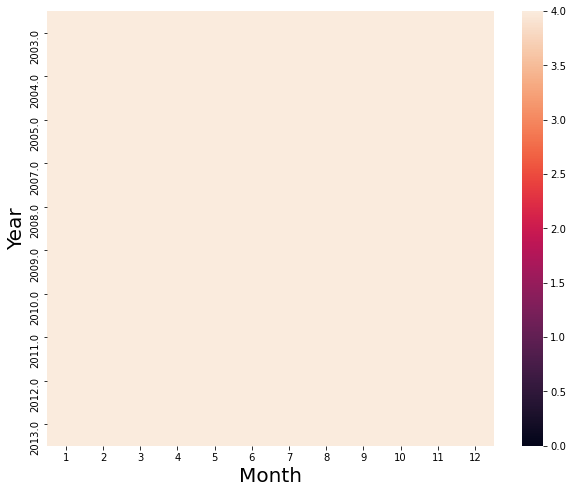

In [41]:
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in most_sightings_years.index:
       return year
month_vs_year = df.pivot_table(columns=df['Date_time'].dt.month,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
month_vs_year.columns = month_vs_year.columns.astype(int)
print("\nHeatmap for comparison of the top 10 years in which the UFO was sighted vs each month:")
plt.figure(figsize=(10,8))
ax = sns.heatmap(month_vs_year, vmin=0, vmax=4)
ax.set_xlabel('Month').set_size(20)
ax.set_ylabel('Year').set_size(20)

Q40. Write a pandas program to create a Timewheel of Hour VS Year
comparison of the top 10 years in which the (UFO) was sighted


Comparison of the top 10 years in which the UFO was sighted vs each month:


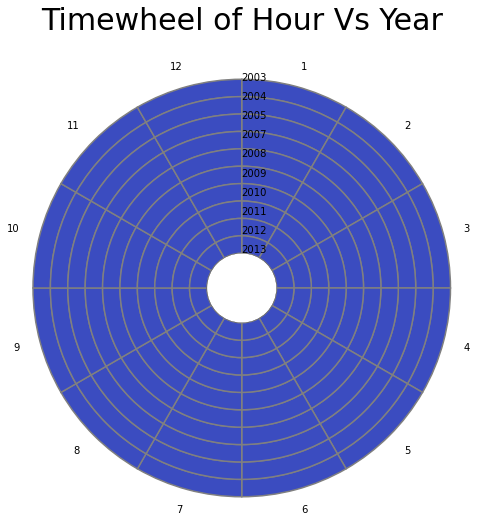

In [42]:
import matplotlib as mpl
import matplotlib.cm as cm
most_sightings_years = df['Date_time'].dt.year.value_counts().head(10)
def is_top_years(year):
   if year in most_sightings_years.index:
       return year
month_vs_year = df.pivot_table(columns=df['Date_time'].dt.month,index=df['Date_time'].dt.year.apply(is_top_years),aggfunc='count',values='city')
month_vs_year.index = month_vs_year.index.astype(int)
month_vs_year.columns = month_vs_year.columns.astype(int)
print("\nComparison of the top 10 years in which the UFO was sighted vs each month:")
def pie_heatmap(table, cmap='coolwarm_r', vmin=None, vmax=None,inner_r=0.25, pie_args={}):
   n, m = table.shape
   vmin= table.min().min() if vmin is None else vmin
   vmax= table.max().max() if vmax is None else vmax

   centre_circle = plt.Circle((0,0),inner_r,edgecolor='black',facecolor='white',fill=True,linewidth=0.25)
   plt.gcf().gca().add_artist(centre_circle)
   norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
   cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)

   for i, (row_name, row) in enumerate(table.iterrows()):
       labels = None if i > 0 else table.columns
       wedges = plt.pie([1] * m,radius=inner_r+float(n-i)/n, colors=[cmapper.to_rgba(x) for x in row.values],
           labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
       wedges = plt.pie([1], radius=inner_r+float(n-i-1)/n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
       plt.setp(wedges[0], edgecolor='grey',linewidth=1.5)
plt.figure(figsize=(8,8))
plt.title("Timewheel of Hour Vs Year",y=1.08,fontsize=30)
pie_heatmap(month_vs_year, vmin=-20,vmax=80,inner_r=0.2)

## Great Job!